In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [ ]:
# Importa um dataset contendo um dataframe que revela imagens de números escritos à mão
mnist = fetch_openml('mnist_784', version = 1)

print(mnist.size)
# Dimensão de cada imagem: 28px x 28px
# 28 imagens uma do lado da outra (28*28 = 784)
# 2500 imagens diferentes empilhadas uma em cima da outra (2500 x 28 = 70.000 linhas)

In [10]:
print(type(mnist),"\n")
print(mnist["DESCR"])

<class 'sklearn.utils._bunch.Bunch'> 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the 

In [28]:
# X representa a variável independente, ou seja, é o dataframe que contém os valores dos pixels da imagem do número.
x = mnist['data']

# Y é a variável dependente (target), ou seja, é o valor correto da imagem de X, a resolução que o algoritmo deverá identificar.
y = mnist['target']

In [35]:
# Aqui é possível visualizar que x contém um dataframe
display(x)

# Podemos ver que Y é uma série unidimensional, que contém os valores relativos (targets) à imagem contida em X
print(y)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [ ]:
# Aqui é necessário remover os cabeçalhos e o índice do df x, pois o plt precisa somente de uma matriz 28x28, como veremos na próxima célula.
x = x.values

# Convertendo os valores string do dataframe target para integer.
y = y.astype(int)

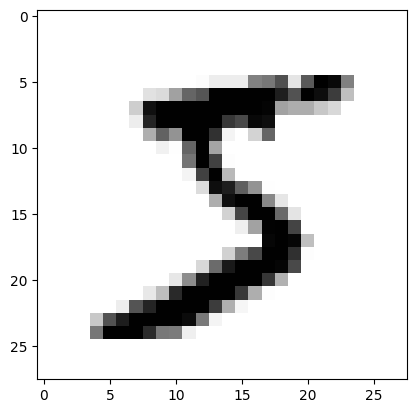

In [ ]:
# Exemplo com a primeira imagem (índice 0) do dataset:

# A função imshow do plotly exibe a imagem de acordo com o mapeamento dos pixels do df
plt.imshow(x[0].reshape(28,28), cmap="binary") #Dimensão 28x28 pixels, binary para ficar em preto e branco.
plt.show()

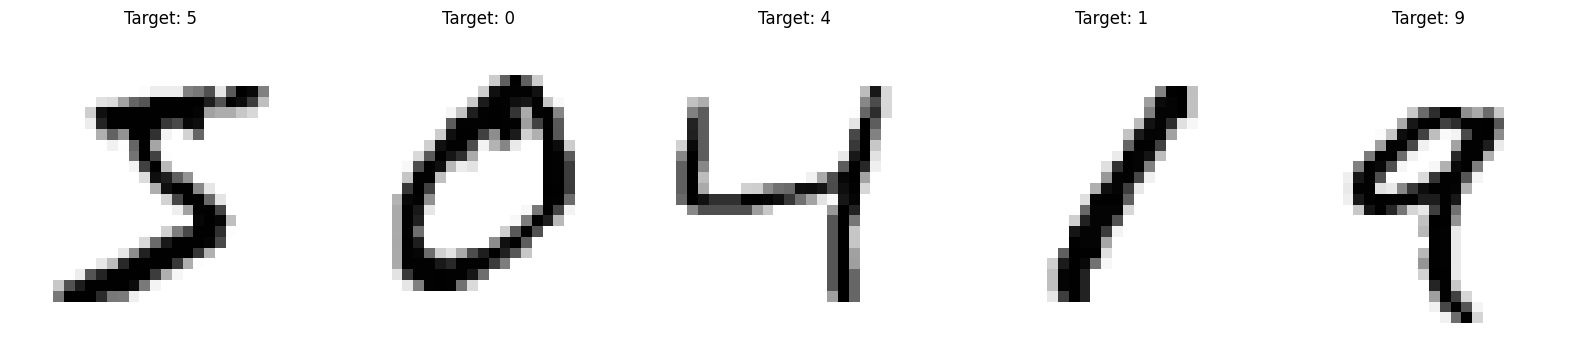

In [ ]:
# Prova de conceito com os 4 primeiros targets do dataset:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))  # 1 linha, 5 colunas

for indice in range(5):
    #Dimensão 28x28 pixels, binary para ficar em preto e branco.
    axs[indice].imshow(x[indice].reshape(28, 28), cmap="binary") 
    axs[indice].set_title(f"Target: {y[indice]}")
    axs[indice].axis('off')  # Oculta os eixos para limpar o visual

plt.tight_layout()
plt.show()

## Classificador Binário ##

In [53]:
from sklearn.model_selection import train_test_split

# Vamos "quebrar" cada dataframe em duas partes: 70% para treino do modelo, 30% para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [ ]:
# Para treinar o modelo, vamos começar categorizando quais registros são equivalentes a 5 
y_train_5 = (y_train == 5) # Aqui criamos um novo target booleano que diz se a sua imagem correspondente é 5 ou não

# Resetar o índice da série após a fragmentação do df
y_train_5.reset_index(drop=True, inplace= True)

In [63]:
y_train_5

35607    False
46982    False
37717     True
8158     False
42772    False
         ...  
4995     False
1916     False
24388    False
65389     True
18048    False
Name: class, Length: 49000, dtype: bool

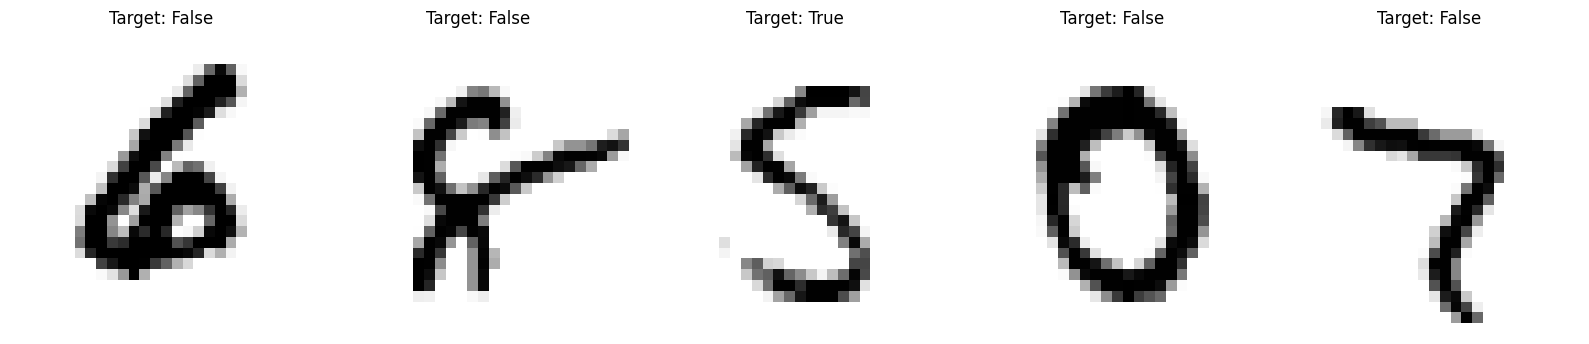

In [77]:
# Prova de conceito com os 5 primeiros targets do dataset:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))  # 1 linha, 5 colunas

for indice in range(5):
    #Dimensão 28x28 pixels, binary para ficar em preto e branco.
    axs[indice].imshow(x_train[indice].reshape(28, 28), cmap="binary") 
    axs[indice].set_title(f"Target: {y_train_5[indice]}")
    axs[indice].axis('off')  # Oculta os eixos para limpar o visual

plt.tight_layout()
plt.show()

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
# Aqui instanciamos o modelo como objeto que será referenciado ao longo do treinamento.
sgd_clf = SGDClassifier()

# A função fit pode ser interpretada literalmente como "Aprenda!"
sgd_clf.fit(x_train, y_train_5) # Argumentos: Usando o df x_train, eu quero que vc "aprenda" a prever quais valores equivalem a 5 (y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


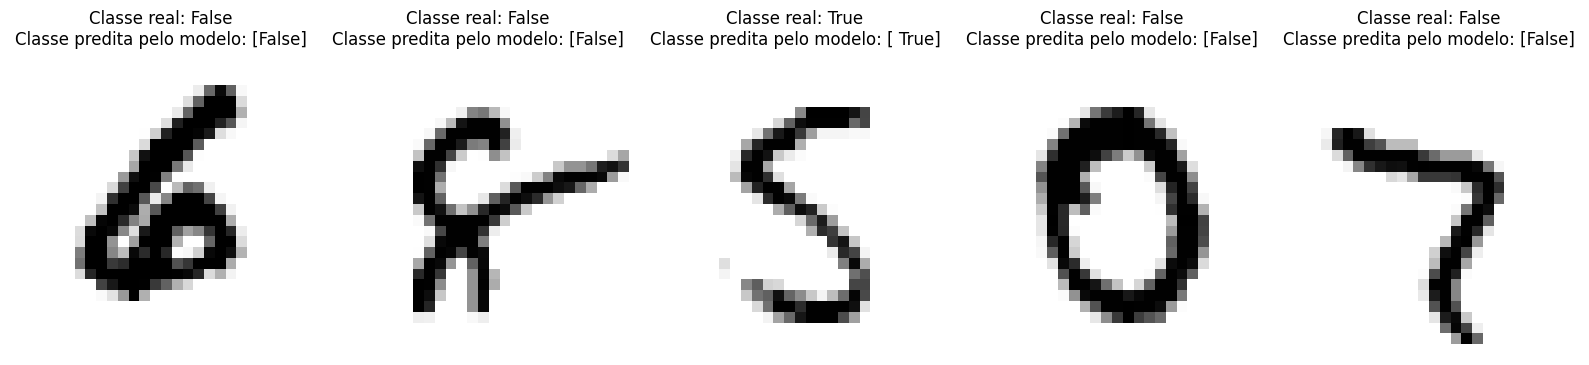

In [85]:
# Prova de conceito com os 5 primeiros targets do dataset:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))  # 1 linha, 5 colunas

for indice in range(5):
    #Dimensão 28x28 pixels, binary para ficar em preto e branco.
    axs[indice].imshow(x_train[indice].reshape(28, 28), cmap="binary") 
    axs[indice].set_title(f"Classe real: {y_train_5[indice]}\nClasse predita pelo modelo: {sgd_clf.predict([x_train[indice]])}")
    axs[indice].axis('off')  # Oculta os eixos para limpar o visual

plt.tight_layout()
plt.show()

## Medindo a acurácia do modelo binário ##

In [ ]:
from sklearn.model_selection import cross_val_score
# Aqui aplicamos a Validação Cruzada (Cross Validation) para avaliar o desempenho do modelo.
# O conjunto de dados será dividido em 3 partes (folds), e a métrica utilizada será a acurácia (accuracy).
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

# A função de Validação Cruzada retorna uma lista com os scores de 0 a 1 de cada fold avaliado.
# Essa análise é 

array([0.86629117, 0.8844058 , 0.88318129])

In [ ]:
from sklearn.metrics import confusion_matrix

# Aqui aplicamos uma matriz de confusão para identificar acertos e erros do modelo
print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))

print('\n[[Acerto Negativo, Falso Negativo],\n[Falso Positivo, Acerto Positivo]]')

[[43054  1625]
 [  435  3886]]

[[Acerto Negativo, Falso Negativo],
[Falso Positivo, Acerto Positivo]]


## Classificação Multiclasse ##

In [92]:
sgd_clf.fit(x_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


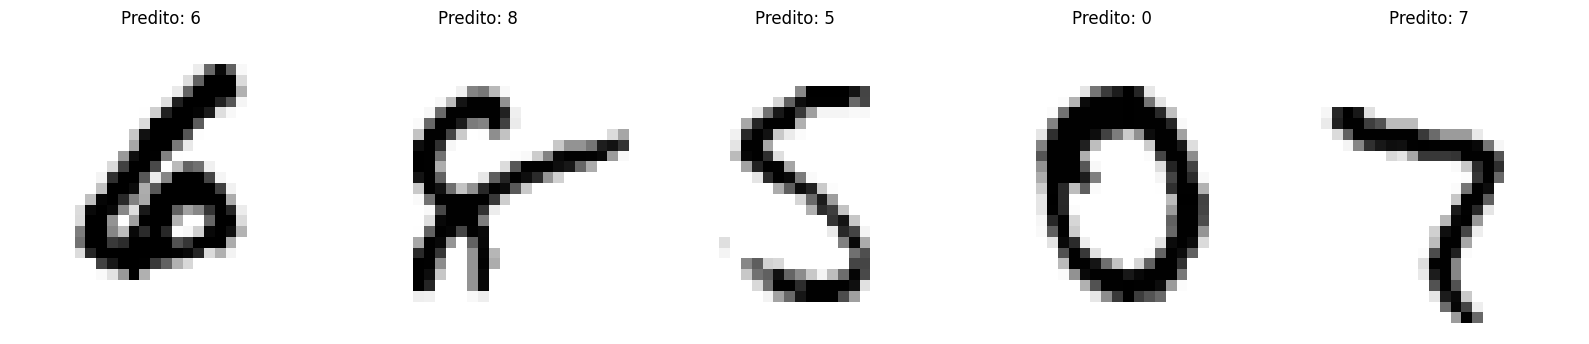

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

for indice in range(5):
    axs[indice].imshow(x_train[indice].reshape(28, 28), cmap="binary")  # usa o subplot certo
    pred = sgd_clf.predict([x_train[indice]])[0]  # passa como array e extrai o resultado
    axs[indice].set_title(f"Predito: {pred}")
    axs[indice].axis('off')

plt.tight_layout()
plt.show()